## Simulazioni 

In [31]:
library(tidyverse)
library(ggplot2)

### Eventi estratti da una distribuzione binomiale di probabilità
Supponiamo di osservare un prodotto su amazon che contiene una serie di review, la pagina sostiene che il rate di recensioni positive rispetto a quelle negative sia p con un numero di recensioni pari a n. Chiediamoci quanto effettivamente possiamo ritenere veritiero questo dato in funzione del numero di recensioni n. Vogliamo pertanto dedurre se effettivamente il rate sia p=0.95 ad esempio oppure un altro valore: 

$$ P(rate|data) = \frac{P(data|rate) \cdot P(rate)}{P(data)}$$

La probabilità di osservare un certo rateo di recensioni positive dunque dipende dai dati e da quanto la famiglia di modelli che scegliamo per rappresentarli è con essi consistente. Ad esempio supponiamo di considerare la famiglia di distribuzioni binomiali funzioni del parametro p, ovvero quel rate su cui vogliamo fare inferenza. Scelti tali modelli ($P(data|rate)$ likelihood) è necessario supporre che inizialmente questo rate abbia una certa distribuzione di probabilità di essere osservato, il prior $P(rate)$; nel caso in cui la nostra ignoranza fosse la massima possibile allora utilizzeremmo un prior uniforme. Esso rappresenta l'equiprobabilità di vedere inizialmente, prima di aver raccolto alcun dato, un rate nell'intervallo $[0,1]$.  

Calcoliamo la likelihood tramite la seguente simulazione scegliendo:
- il numero di recensioni n
- il numero di recensioni positive k 
- il numero di volte in cui eseguire la simulazione m
- la probabilità di osservare una recensione positiva p

Concentriamoci per fare un esempio sulla probabilità di trovare k recensioni positive rispetto alle n osservate se il modello che le descrive è una distribuzione binomiale:

$$ P(k \ \checkmark \ ratings|rate=p) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}$$

In [2]:
# simulating a binomial experience with a probability rate of 95%
n <- 1000 
# assume we have n extractions 
p <- 0.95 
# rate of success is equal to p 

x <- runif(n)
# x is a vector of random numbers from zero to one with length n
# x[x > 0.95] = 1
# x[x != 1] = 0
# this one is only a sequence of 1000 extractions where the ones are the positive experiences and zero the others; we should simulate m times 
# this scenario and after that represent an histogram where the number of positive experiences is the random variable

v <- length(x[x > p])
# instead of assigning to the whole vector zeros and ones i decide to measure the legngth of the resulting vector after a logical indexing.
# As we have seen before i have to simulate m times this number v and make an histogram

In [2]:
binomialsampling <- function(n,m,p){
    v <- rep(NA,m)
    for(i in 1:m){
        x <- runif(n)
        v[i] <- length(x[x <= p])
        }
    return(v)
}

How many ratings are there? 50
What is the number of positive ratings? 48
How many times do you want to simulate the extractions? 1000
What is the probability of seeing a good rating? 0.95


[1] "The probability of seeing 48 positive responses versus 50 is 26.50 %"

[1] "The probability of seeing 48 positive responses versus 50 from theory is 26.11 %"

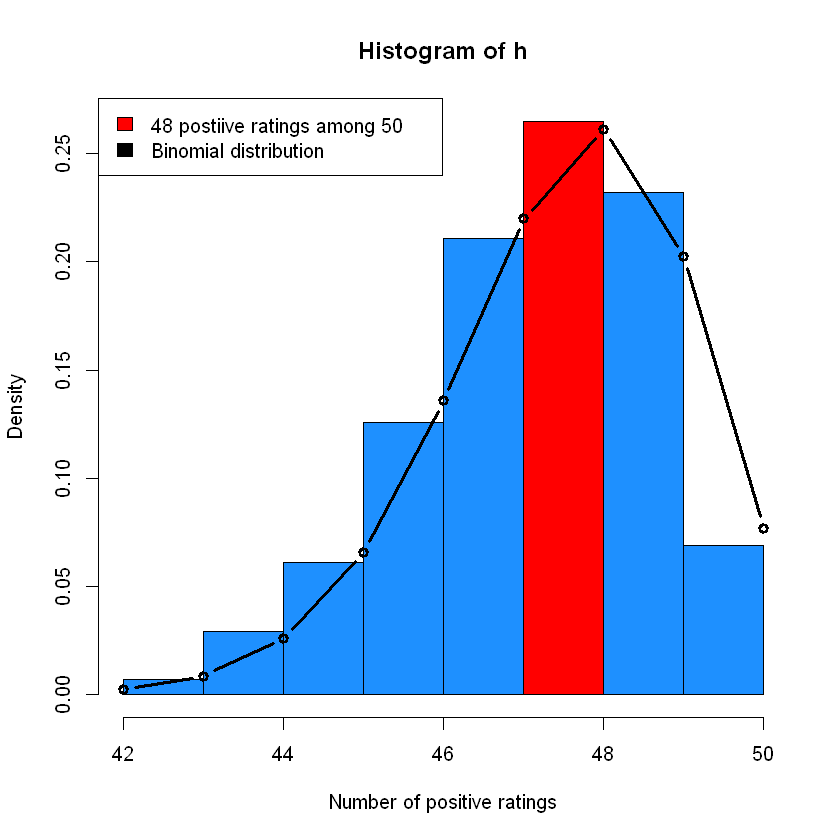

In [50]:
n <- as.numeric(readline(prompt = "How many ratings are there?"))
k <- as.numeric(readline(prompt = "What is the number of positive ratings?"))
# questo k serve per colorare diversamente il bin corrispondente nell'istogramma visto che ci stiamo concentrando su una specifica situazione
m <- as.numeric(readline(prompt = "How many times do you want to simulate the extractions?"))
p <- as.numeric(readline(prompt = "What is the probability of seeing a good rating?"))

# in this way i can decide what are the parameters of the simulation for each iteration 

h <- binomialsampling(n,m,p)

histogram <- hist(h,plot=FALSE)
#cuts <- cut(histogram$breaks, c(-Inf,47,48,Inf))
colors = ifelse(histogram$breaks < k-1, "dodgerblue", ifelse(histogram$breaks >= k, "dodgerblue", "red"))
plot(histogram, col=colors, xlab="Number of positive ratings", freq=FALSE)
# aggiungo il plot della binomiale teorica ottenuta attraverso la funzione base di R
x <- seq(42,50, by = 1)
y <- dbinom(x,n,p)
lines(x,y, lwd = 3, type = "b", col="black")

legend("topleft", legend = c(sprintf("%i postiive ratings among %i", k, n),"Binomial distribution") , col=c("red","black"), fill=c("red","black"))


sprintf("The probability of seeing %i positive responses versus %i is %.2f %%",k, n, length(h[h == k])/m*100)
sprintf("The probability of seeing %i positive responses versus %i from theory is %.2f %%",k, n, y[x == k]*100)